<h2><center><font color="black"><strong>Test d'algorithme sur Marseille</strong></font></center></h2>

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [175]:
    # Models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

    # Pipeline & Preprocess
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MaxAbsScaler, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

    # Scores
from sklearn.metrics import balanced_accuracy_score, make_scorer, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error , r2_score
from sklearn.metrics import mean_absolute_percentage_error

#### Import de la base

In [39]:
df_Paris = pd.read_csv('../Data/df_Paris_Processed.csv', low_memory = False, encoding = 'latin1')
df_Marseille = pd.read_csv('../Data/df_Marseille_Processed.csv', low_memory = False, encoding = 'latin1')
df_Lyon = pd.read_csv('../Data/df_Lyon_Processed.csv', low_memory = False, encoding = 'latin1')
df_Toulouse = pd.read_csv('../Data/df_Toulouse_Processed.csv', low_memory = False, encoding = 'latin1')

In [195]:
df = pd.concat([df_Paris, df_Marseille, df_Lyon, df_Toulouse] , axis=0 , ignore_index=True)

In [204]:
%run '../Helpers/preprocessing.py'

In [183]:
%run '../Helpers/graph.py'

In [212]:
%run '../Helpers/score.py'

#### Visualisation de la base

In [116]:
df.head(4)

,id_mutation,date_mutation,code_type_local,code_commune,surface_terrain,surface_reelle_bati,nombre_pieces_principales,nature_culture,valeur_fonciere,latitude,longitude,nombre_lots,numero_disposition,code_departement,geometry,index_right,year,reg_code,reg_name,dep_code,dep_name,arrdep_code,bv2012_code,bv2012_name,epci_code,epci_name,com_code,com_name,com_arm_cod,com_arm_nam,iris_code,iris_name,iris_name_u,iris_name_l,iris_area_c,iris_type,iris_grd_qu,iris_in_ctu,Prix_m2,Year,Month,prix_m2_moy_surf_habit,prix_m2_moy_terrain,Prix_m2_log,num_trimestre,quarter
197251,2017-488961,2017-07-01,2.0,69388,0.0,18.0,1.0,0,79000.0,45.739298,4.876648,1,1,69,POINT (4.876648 45.739298),28445.0,2022,['84'],['Auvergne-RhÃÂ´ne-Alpes'],['69'],['RhÃÂ´ne'],['691'],['69123'],['Lyon'],['200046977'],['MÃÂ©tropole de Lyon'],['69123'],['Lyon'],['69388'],['Lyon 8e Arrondissement'],['693880301'],['Laennec'],LAENNEC,laennec,FXX,iris d'habitat,La Buire-Bataille,Non,4388.888889,2017,7,3389.569825,0.000000,8.386831,3,2017_Q3
6871,2017-742174,2017-07-01,2.0,75115,0.0,68.0,3.0,0,667000.0,48.847004,2.288406,2,1,75,POINT (2.288406 48.847004),49173.0,2022,['11'],['ÃÂle-de-France'],['75'],['Paris'],['751'],['75056'],['Paris'],['200054781'],['MÃÂ©tropole du Grand Paris'],['75056'],['Paris'],['75115'],['Paris 15e Arrondissement'],['751155906'],['Grenelle 6'],GRENELLE 6,grenelle 6,FXX,iris d'habitat,Grenelle,Non,9808.823529,2017,7,9126.266145,0.000000,9.191038,3,2017_Q3
230251,2017-188961,2017-07-01,2.0,31555,0.0,48.0,3.0,0,210000.0,43.594604,1.454384,1,1,31,POINT (1.454384 43.594604),38827.0,2022,['76'],['Occitanie'],['31'],['Haute-Garonne'],['313'],['31555'],['Toulouse'],['243100518'],['Toulouse MÃÂ©tropole'],['31555'],['Toulouse'],['31555'],['Toulouse'],['315551201'],['Montplaisir'],MONTPLAISIR,montplaisir,FXX,iris d'habitat,Le Busca,Non,4375.000000,2017,7,4133.066140,6236.574950,8.383662,3,2017_Q3
232221,2017-189205,2017-07-01,2.0,31555,0.0,36.0,2.0,0,78000.0,43.581469,1.460740,1,1,31,POINT (1.46074 43.581469),11945.0,2022,['76'],['Occitanie'],['31'],['Haute-Garonne'],['313'],['31555'],['Toulouse'],['243100518'],['Toulouse MÃÂ©tropole'],['31555'],['Toulouse'],['31555'],['Toulouse'],['315552404'],['Bonnat'],BONNAT,bonnat,FXX,iris d'habitat,Sauzelong-Rangueil,Non,2166.666667,2017,7,2029.073830,4345.034704,7.680945,3,2017_Q3


## <center> Définition des fonctions utiles (à déplacer dans les Helpers)

In [ ]:
# Mettre en log les variables continues

In [37]:
def log_var(data, liste_var) : 
    for variable in liste_var :
        new_variable = variable + '_log'
        data[new_variable] = np.log(data[variable])

In [ ]:
# Normaliser les données

In [ ]:
# Créer les variables Annee-Trimestre

In [31]:
def annee_trimestre(data) : 
        # Mettre le format date
    data['date_mutation'] = pd.to_datetime(data['date_mutation'], format = '%Y-%m-%d')
        # num_trimestre indique le trimestre de la date mutation ie 1, 2, 3 ou 4
    data['num_trimestre'] = data['date_mutation'].dt.quarter
        # Concaténation sous la forme YEAR-Qi
    data['quarter'] = data['Year'].astype(str) + '_Q' + data['trimestre'].astype(str)

In [ ]:
# Pour le split temporel à actualiser (ie prendre t-1)

In [ ]:
# Pour le modèle

In [148]:
def filtre_data_pour_model(data, ville, type_local, quantile_low = None, quantile_high = None) :
    data_model = data.copy()
    
    max_prix = np.quantile(df.Prix_m2, quantile_high)
    min_prix = np.quantile(df.Prix_m2, quantile_low)
    
    if quantile_low : 
        data_model = data_model[data_model.Prix_m2 > min_prix]
    if quantile_high : 
        data_model = data_model[data_model.Prix_m2 < max_prix]
        
    data_model = data[(df['bv2012_name'] == "['" + ville + "']")
                     & (df.code_type_local == type_local)]
    
    return(data_model)

In [101]:
def split_temporel_V1(data, liste_features, liste_output) :
    data = data.sort_values('date_mutation')
    X = data[liste_features]
    y = data[liste_output]
    
    # Shuffle = False pour garder les dernières obs en test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)
    return(X_train, X_test, y_train, y_test)

In [5]:
# Pour utiliser les Knn

## <center> Appliquer les fonctions aux données

In [229]:
    # Créer la variable log
log_var(df, ['Prix_m2'])
log_var(df, ['valeur_fonciere'])

In [201]:
    # Ajouter la variable ANNEE-TRIMESTRE
annee_trimestre(df)

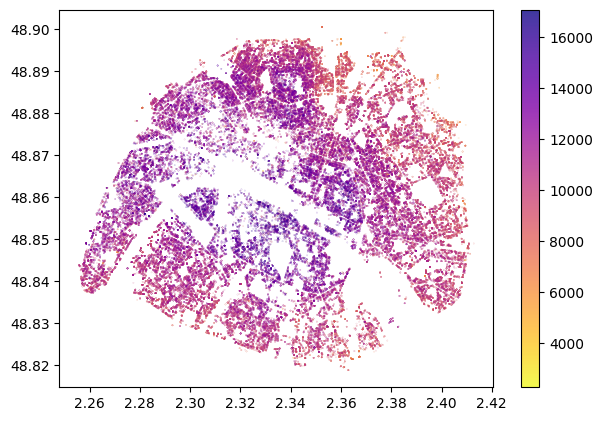

In [187]:
visualise(df, 200, 1000, 'Paris', 2, 0.99, 0.1)

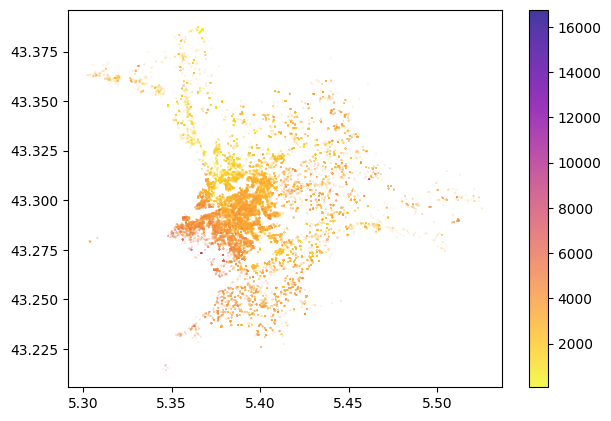

In [191]:
visualise(df, 200, 1000, 'Marseille - Aix-en-Provence', 2, 0.99, 0)

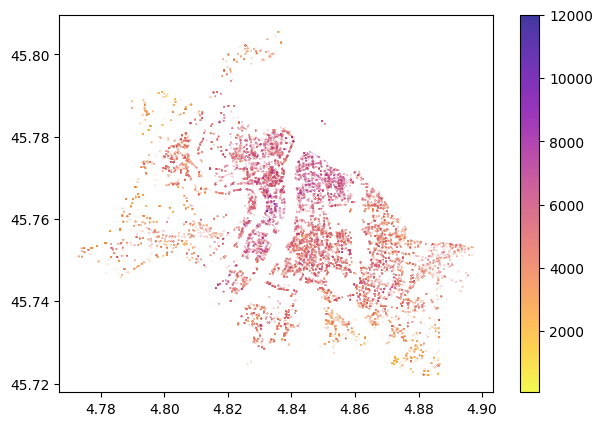

In [189]:
visualise(df, 200, 1000, 'Lyon', 2, 1, 0)

## <center> K plus proches voisins sur la latitude/longitude

#### Pour PARIS

In [238]:
    # Définition du dataset
# Sélectionner Paris sur les appartements (2) + sélection sur les quantiles
df_model = filtre_data_pour_model(df, 'Paris', 2, 0.1, 0.99)

    # Définition des var explicatives
features = ['latitude', 'longitude']
    # Def de l'output
label = 'Prix_m2_log'

In [239]:
# Split des données en TRAIN et TEST
X_train, X_test, y_train, y_test = split_temporel_V1(df_model, features, label)

La tableau nous indique de prendre 27 voisins.

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), ('Knn', KNeighborsRegressor(weights='distance'))])
parameters = {'Knn__n_neighbors': range(1,21,2)} # defining parameter space
knn_pipe = GridSearchCV(pipe, parameters, cv=5)
knn_pipe.fit(X_train, y_train)

print('Returned hyperparameter: {}'.format(knn_pipe.best_params_))
print('Best classification accuracy in train is: {}'.format(knn_pipe.best_score_))
print('Classification accuracy on test is: {}'.format(knn_pipe.score(X_test, y_test)))

In [ ]:
compute_scores(knn_pipe, X_test, y_test)

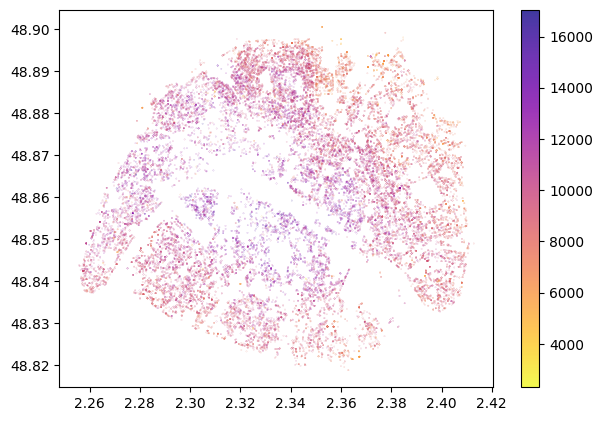

In [228]:
y_pred = knn_pipe.predict(X_test)

x = X_test['longitude']
y = X_test['latitude']
c = np.exp(y_pred)

plt.rcParams['figure.figsize'] = [7, 5]
plt.rcParams['figure.dpi'] = 100 

plt.scatter(x, y, s=0.01, c=c, cmap='plasma_r', alpha=0.8)
plt.colorbar()
plt.show()

In [232]:
def run_model_knn(data, ville, type_local, q_low, q_high,
                 scaler, model, nb_voisins, nb_cv, graph_on_test = False) : 
    
    df_model = filtre_data_pour_model(data, ville, type_local, q_low, q_high)
    
    features = ['latitude', 'longitude']
    label = 'Prix_m2_log'
    
    X_train, X_test, y_train, y_test = split_temporel_V1(df_model, features, label)
    
    pipe = Pipeline([('scaler', scaler), ('Knn', model(weights='distance'))])
    parameters = {'Knn__n_neighbors': nb_voisins} # defining parameter space
    knn_pipe = GridSearchCV(pipe, parameters, cv=nb_cv)
    knn_pipe.fit(X_train, y_train)
    
    # Afficher les scores
    print('Returned hyperparameter: {}'.format(knn_pipe.best_params_))
    print('Best classification accuracy in train is: {}'.format(knn_pipe.best_score_))
    print('Classification accuracy on test is: {}'.format(knn_pipe.score(X_test, y_test)))

    compute_scores(knn_pipe, X_test, y_test)
    
    if graph_on_test : 
        y_pred = knn_pipe.predict(X_test)

        x = X_test['longitude']
        y = X_test['latitude']
        c = np.exp(y_pred)

        plt.rcParams['figure.figsize'] = [7, 5]
        plt.rcParams['figure.dpi'] = 100 

        plt.scatter(x, y, s=0.01, c=c, cmap='plasma_r', alpha=0.8)
        plt.colorbar()
        plt.show()

Returned hyperparameter: {'Knn__n_neighbors': 19}
Best classification accuracy in train is: 0.2115394662595234
Classification accuracy on test is: -0.11585218164222666
MAPE:  2.729905246630625
MDAPE:  2.3023922118660214


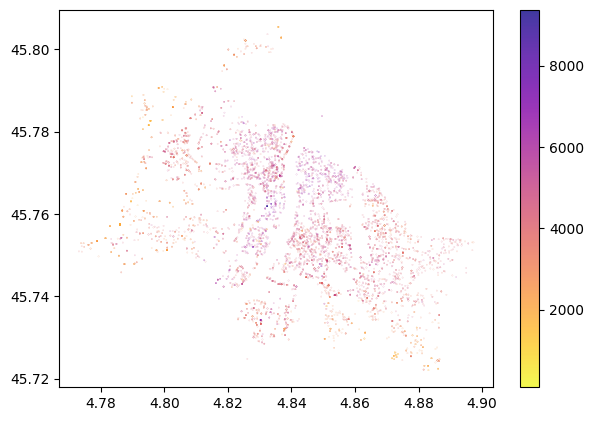

In [233]:
run_model_knn(df, 'Lyon', 2, 0, 1,
                 StandardScaler(), KNeighborsRegressor, range(1,21,2), 5, True)

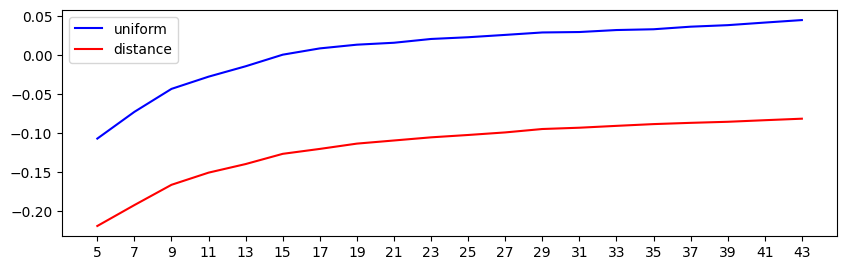

In [151]:
uniform  = []
distance = []
r = range (5,45,2)

for k in r:
    
    # Euclidan, 'straight' distance
    model = KNeighborsRegressor(n_neighbors = k, weights='uniform')
    model.fit(X_train.values, y_train.values)
    uniform.append(model.score(X_test.values,y_test.values))

    # Distance is inversely proportional (to lessen the weight of outliers)
    model = KNeighborsRegressor(n_neighbors = k, weights='distance') 
    model.fit(X_train.values, y_train.values)
    distance.append(model.score(X_test.values,y_test.values))

uniform = np.array(uniform)
distance = np.array(distance)

plt.rcParams['figure.figsize'] = [10, 3]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.plot(r,uniform,label='uniform',color='blue')
plt.plot(r,distance,label='distance',color='red')
plt.legend()
plt.gca().set_xticks(r)
plt.show()

In [176]:
mean_absolute_percentage_error(y_test, y_pred_test)

0.01963429229747025

In [50]:
#pd.DataFrame({"k" : r, "uniform" : uniform, "distance" : distance})